<a href="https://colab.research.google.com/github/SShreya22/Wind_Turbine/blob/main/Wind_Turbine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q python-dotenv kaggle

In [2]:
from dotenv import load_dotenv
import os
from google.colab import drive
drive.mount('/content/drive')
load_dotenv("/content/drive/My Drive/Colab Notebooks/.env")

Mounted at /content/drive


True

In [3]:
# Define dataset directory
DATASET_DIR = "/content/wind_turbine/"
ZIP_FILE = "wind-turbine-power-generation-forecasting.zip"

In [4]:
if not os.path.exists(f"{DATASET_DIR}{ZIP_FILE}"):
    !kaggle datasets download -d gauravduttakiit/wind-turbine-power-generation-forecasting -p {DATASET_DIR}

!unzip -o {DATASET_DIR}{ZIP_FILE} -d {DATASET_DIR}

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/wind-turbine-power-generation-forecasting
License(s): CC0-1.0
 60% 7.00M/11.7M [00:00<00:00, 66.7MB/s]
100% 11.7M/11.7M [00:00<00:00, 78.9MB/s]
Archive:  /content/wind_turbine/wind-turbine-power-generation-forecasting.zip
  inflating: /content/wind_turbine/Dataset/Submission.csv  
  inflating: /content/wind_turbine/Dataset/Test.csv  
  inflating: /content/wind_turbine/Dataset/Train.xlsx  


In [5]:
import glob
import pandas as pd

# Search for CSV files inside ALL subfolders
csv_files = glob.glob(f"{DATASET_DIR}/**/*.csv", recursive=True)

if csv_files:
    print("✅ Found CSV file:", csv_files[0])  # Print the found file
    df = pd.read_csv(csv_files[0])  # Load the correct file
    print("Dataset loaded successfully!")
    df.head()
else:
    print("❌ No CSV file found in dataset folder!")


✅ Found CSV file: /content/wind_turbine/Dataset/Submission.csv
Dataset loaded successfully!


In [6]:
!ls -a
!git clone https://github.com/SShreya22/wind_turbine.git
%cd wind_turbine

.  ..  .config	drive  sample_data  wind_turbine
fatal: destination path 'wind_turbine' already exists and is not an empty directory.
/content/wind_turbine


In [7]:
!pip install kaggle
import os
import pandas as pd
from dotenv import load_dotenv

!kaggle datasets download -d gauravduttakiit/wind-turbine-power-generation-forecasting
!unzip /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip -d /content/wind_turbine/

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/wind-turbine-power-generation-forecasting
License(s): CC0-1.0
wind-turbine-power-generation-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip, /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip.zip or /content/wind_turbine/wind_turbine/wind_turbine/wind-turbine-power-generation-forecasting.zip.ZIP.


In [8]:
import pandas as pdy
df = pd.read_csv("/content/wind_turbine/Dataset/Test.csv")
df.head()

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,35040,01/01/17 0:00,1,19.6796,89.664205,17.072595,1.085389,0.867799,192.051683,233.057315,1.636515
1,35041,01/01/17 1:00,1,19.1796,90.664205,16.672595,1.665389,1.907799,183.051683,197.057315,2.736515
2,35042,01/01/17 2:00,1,19.5796,88.664205,16.672595,1.845389,2.867799,162.051683,167.057315,2.736515
3,35043,01/01/17 3:00,1,20.3796,85.664205,16.572595,2.325389,3.987799,166.051683,161.057315,2.936515
4,35044,01/01/17 4:00,1,21.0796,82.664205,16.572595,2.265389,4.047799,182.051683,170.057315,3.136515


In [9]:
#pattern = r'(\d{2}/\d{2}/\d{2})\s(\d{1,2}:\d{2})'      #pattern is a regular expression (regex) which is used to separate date and time from the column time. (\d{2}=2 digits,\s=space,\d{1,2}=1 or 2 digits)
#df[['Date', 'Hour']] = df['Time'].str.extract(pattern) #creating 2 new columns to store date and time separately, from the existing 'time' column and extracting the date and time from pattern.
#print(df.head(10))

In [10]:
#df=df.drop(columns=['Time']) #dropping the column time

In [11]:
print(df.shape)

(35040, 11)


In [12]:
data=df.to_string()
print(len(data))

4660452


In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
Time,0
Location,0
Temp_2m,0
RelHum_2m,0
DP_2m,0
WS_10m,0
WS_100m,0
WD_10m,0
WD_100m,0


In [14]:
print(df.isnull().values.any())

False


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [16]:
print(df.tail(5))

       Unnamed: 0            Time  Location   Temp_2m  RelHum_2m     DP_2m  \
35035       43795  31/12/17 19:00         4  0.406542   0.928571  0.521296   
35036       43796  31/12/17 20:00         4  0.404984   0.904762  0.513889   
35037       43797  31/12/17 21:00         4  0.401869   0.880952  0.507407   
35038       43798  31/12/17 22:00         4  0.401869   0.869048  0.503704   
35039       43799  31/12/17 23:00         4  0.401869   0.857143  0.500926   

         WS_10m   WS_100m    WD_10m   WD_100m    WG_10m  
35035  0.260898  0.288478  0.008357  0.022222  0.268293  
35036  0.305791  0.326297  0.000000  0.013889  0.257840  
35037  0.299935  0.328496  0.008357  0.022222  0.257840  
35038  0.299284  0.322779  0.002786  0.016667  0.254355  
35039  0.302537  0.337291  0.022284  0.033333  0.254355  


In [17]:
print(df.head(10))

   Unnamed: 0           Time  Location   Temp_2m  RelHum_2m     DP_2m  \
0       35040  01/01/17 0:00         1  0.362928   0.880952  0.461111   
1       35041  01/01/17 1:00         1  0.359034   0.892857  0.457407   
2       35042  01/01/17 2:00         1  0.362150   0.869048  0.457407   
3       35043  01/01/17 3:00         1  0.368380   0.833333  0.456481   
4       35044  01/01/17 4:00         1  0.373832   0.797619  0.456481   
5       35045  01/01/17 5:00         1  0.375389   0.809524  0.460185   
6       35046  01/01/17 6:00         1  0.356698   0.880952  0.452778   
7       35047  01/01/17 7:00         1  0.377726   0.857143  0.472222   
8       35048  01/01/17 8:00         1  0.404984   0.773810  0.487963   
9       35049  01/01/17 9:00         1  0.445483   0.690476  0.512963   

     WS_10m   WS_100m    WD_10m   WD_100m    WG_10m  
0  0.059857  0.033421  0.534819  0.650000  0.041812  
1  0.097593  0.079156  0.509749  0.550000  0.080139  
2  0.109304  0.121372  0.451253  0

In [18]:
df=df.drop(['Unnamed: 0'], axis=1)

In [19]:
df.head(7)

,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m
0,01/01/17 0:00,1,0.362928,0.880952,0.461111,0.059857,0.033421,0.534819,0.650000,0.041812
1,01/01/17 1:00,1,0.359034,0.892857,0.457407,0.097593,0.079156,0.509749,0.550000,0.080139
2,01/01/17 2:00,1,0.362150,0.869048,0.457407,0.109304,0.121372,0.451253,0.466667,0.080139
3,01/01/17 3:00,1,0.368380,0.833333,0.456481,0.140534,0.170624,0.462396,0.450000,0.087108
4,01/01/17 4:00,1,0.373832,0.797619,0.456481,0.136630,0.173263,0.506964,0.475000,0.094077
5,01/01/17 5:00,1,0.375389,0.809524,0.460185,0.136630,0.168426,0.490251,0.480556,0.080139
6,01/01/17 6:00,1,0.356698,0.880952,0.452778,0.156148,0.152595,0.373259,0.450000,0.108014


In [20]:
print(df.columns)  # List all columns
print(df.head())   # Show first 5 rows
print(df.info())   # Check data types and missing values

Index(['Time', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m',
       'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m'],
      dtype='object')
            Time  Location   Temp_2m  RelHum_2m     DP_2m    WS_10m   WS_100m  \
0  01/01/17 0:00         1  0.362928   0.880952  0.461111  0.059857  0.033421   
1  01/01/17 1:00         1  0.359034   0.892857  0.457407  0.097593  0.079156   
2  01/01/17 2:00         1  0.362150   0.869048  0.457407  0.109304  0.121372   
3  01/01/17 3:00         1  0.368380   0.833333  0.456481  0.140534  0.170624   
4  01/01/17 4:00         1  0.373832   0.797619  0.456481  0.136630  0.173263   

     WD_10m   WD_100m    WG_10m  
0  0.534819  0.650000  0.041812  
1  0.509749  0.550000  0.080139  
2  0.451253  0.466667  0.080139  
3  0.462396  0.450000  0.087108  
4  0.506964  0.475000  0.094077  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --

In [21]:
import numpy as np
import matplotlib.pyplot as plt

original_min_WS = 0.107799417
original_max_WS = 22.84779942
df['WS_100m_actual'] = df['WS_100m'] * (original_max_WS - original_min_WS) + original_min_WS

In [22]:
# Constants
R_dry = 287.05  # Specific gas constant for dry air (J/kg·K)
P_atm = 101325  # Atmospheric pressure (Pa)
Cp = 0.4  # Power coefficient
rotor_area = 100  # Rotor swept area (m²)
df['Temp_K'] = df['Temp_2m'] + 273.15  # Convert temperature from °C to Kelvin

In [23]:
# Estimate specific humidity (q) from relative humidity
# Approximation: q ≈ 0.622 * (RH * e_s) / (P - RH * e_s)
# where e_s (saturation vapor pressure) = 6.11 * exp(17.27 * T / (T + 237.3))
e_s = 6.11 * np.exp(17.27 * df['Temp_2m'] / (df['Temp_2m'] + 237.3))  # in hPa
e_s = e_s * 100  # Convert hPa to Pa
q = 0.622 * (df['RelHum_2m'] / 100 * e_s) / (P_atm - (df['RelHum_2m'] / 100 * e_s))

df['T_v'] = df['Temp_K'] * (1 + 0.61 * q)

# Calculate dynamic air density (ρ)
df['Air_Density'] = P_atm / (R_dry * df['T_v'])

# Calculate Power Output dynamically
df['Power_Output'] = 0.5 * df['Air_Density'] * rotor_area * (df['WS_100m_actual'] ** 3) * Cp

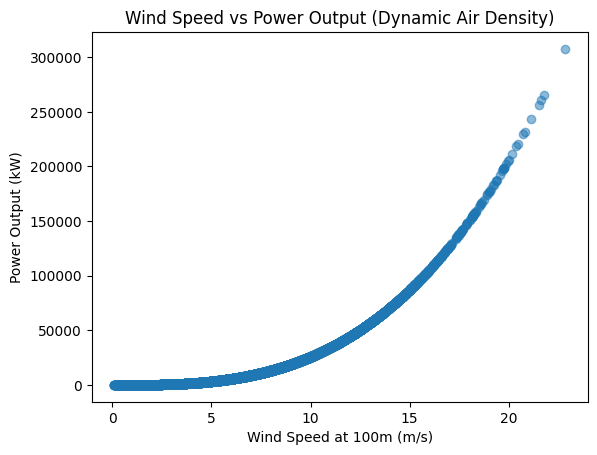

In [24]:
plt.scatter(df['WS_100m_actual'], df['Power_Output'], alpha=0.5)
plt.xlabel('Wind Speed at 100m (m/s)')
plt.ylabel('Power Output (kW)')
plt.title('Wind Speed vs Power Output (Dynamic Air Density)')
plt.show()

In [25]:
print(df[['WS_100m_actual', 'Air_Density', 'Power_Output']].head())

   WS_100m_actual  Air_Density  Power_Output
0        0.867799     1.290542     16.867871
1        1.907799     1.290560    179.228227
2        2.867799     1.290546    608.765293
3        3.987799     1.290518   1636.793729
4        4.047799     1.290493   1711.759282


In [26]:
print(df.head())

            Time  Location   Temp_2m  RelHum_2m     DP_2m    WS_10m   WS_100m  \
0  01/01/17 0:00         1  0.362928   0.880952  0.461111  0.059857  0.033421   
1  01/01/17 1:00         1  0.359034   0.892857  0.457407  0.097593  0.079156   
2  01/01/17 2:00         1  0.362150   0.869048  0.457407  0.109304  0.121372   
3  01/01/17 3:00         1  0.368380   0.833333  0.456481  0.140534  0.170624   
4  01/01/17 4:00         1  0.373832   0.797619  0.456481  0.136630  0.173263   

     WD_10m   WD_100m    WG_10m  WS_100m_actual      Temp_K         T_v  \
0  0.534819  0.650000  0.041812        0.867799  273.512928  273.518589   
1  0.509749  0.550000  0.080139        1.907799  273.509034  273.514770   
2  0.451253  0.466667  0.080139        2.867799  273.512150  273.517733   
3  0.462396  0.450000  0.087108        3.987799  273.518380  273.523737   
4  0.506964  0.475000  0.094077        4.047799  273.523832  273.528961   

   Air_Density  Power_Output  
0     1.290542     16.867871  


In [27]:
# Define features (independent variables)
features = ['WS_100m', 'Temp_2m', 'RelHum_2m', 'WS_10m', 'WD_10m', 'WD_100m', 'WG_10m', 'Air_Density']
X = df[features]  # Selecting only these columns
y = df['Power_Output']  # Target variable (dependent variable)

In [28]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)


Train Data Shape: (28032, 8) (28032,)
Test Data Shape: (7008, 8) (7008,)


In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
# n_estimatros creates 100 decision trees and averages their prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("✅ Model Training Complete!")

✅ Model Training Complete!


In [30]:
# Predict power output for the test set
y_pred = model.predict(X_test)
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: [18801.48610625  9744.16665533  3791.71155963  1920.61191507
  9414.93191688  4697.78669786 15548.40879845   985.68957975
  1813.11707216  6257.18386378]


In [31]:
# Comparing actual and predicted values
comparison = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print(comparison)


         Actual     Predicted
0  18800.601691  18801.486106
1   9743.474646   9744.166655
2   3791.007469   3791.711560
3   1920.576354   1920.611915
4   9414.983148   9414.931917
5   4697.694975   4697.786698
6  15547.945288  15548.408798
7    985.702773    985.689580
8   1813.143379   1813.117072
9   6257.265116   6257.183864


In [32]:
#calculating error
comparison['Error'] = abs(comparison['Actual'] - comparison['Predicted'])
print(comparison)

         Actual     Predicted     Error
0  18800.601691  18801.486106  0.884415
1   9743.474646   9744.166655  0.692009
2   3791.007469   3791.711560  0.704091
3   1920.576354   1920.611915  0.035561
4   9414.983148   9414.931917  0.051231
5   4697.694975   4697.786698  0.091723
6  15547.945288  15548.408798  0.463510
7    985.702773    985.689580  0.013193
8   1813.143379   1813.117072  0.026307
9   6257.265116   6257.183864  0.081252


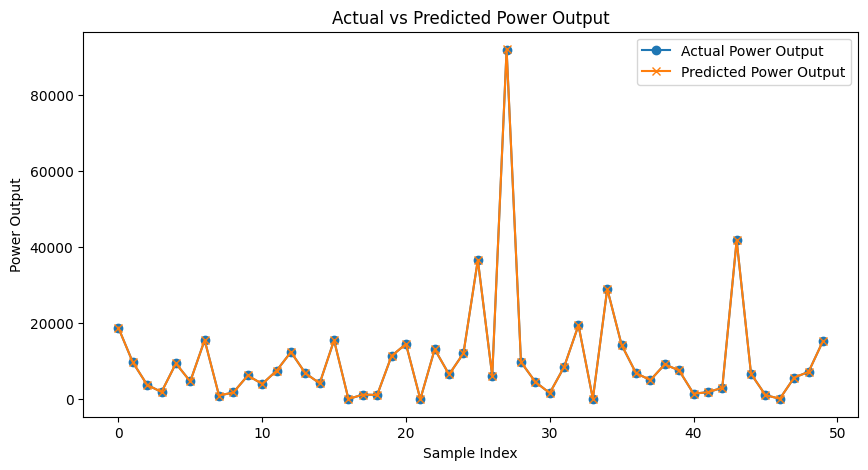

In [33]:
#visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test[:50].values, label="Actual Power Output", marker='o')
plt.plot(y_pred[:50], label="Predicted Power Output", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Power Output")
plt.legend()
plt.title("Actual vs Predicted Power Output")
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Absolute Error (MAE): {mae}")
print(f"📈 Mean Squared Error (MSE): {mse}")
print(f"🎯 R² Score: {r2}")

📉 Mean Absolute Error (MAE): 7.748641015893802
📈 Mean Squared Error (MSE): 28624.495868828573
🎯 R² Score: 0.9999043489079344


In [37]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Check feature importance
xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)
print(xgb_feature_importance_df)


       Feature  Importance
0      WS_100m    0.866059
3       WS_10m    0.081964
6       WG_10m    0.032267
2    RelHum_2m    0.005840
4       WD_10m    0.005660
1      Temp_2m    0.003766
5      WD_100m    0.003293
7  Air_Density    0.001150
